[*********************100%***********************]  1 of 1 completed


Portfolio Summary:

  Stock  Quantity  Buy Price  Current Price     Invested  Current Value  \
0  AAPL      1700   180000.0     271.755005  306000000.0  461983.508301   

    Profit/Loss  Allocation %  
0 -3.055380e+08         100.0  

Total Invested: 306000000.0
Total Current Value: 461983.50830078125
Total Profit/Loss: -305538016.4916992


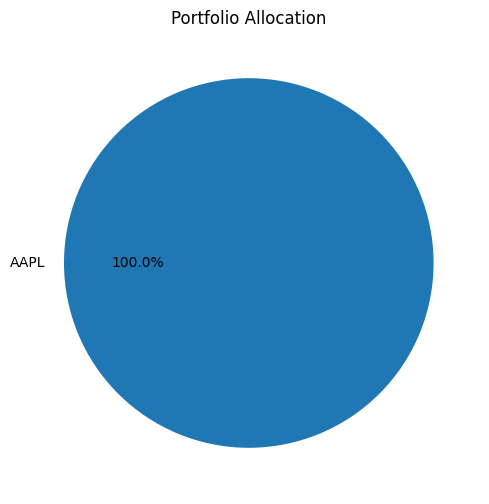

In [19]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

portfolio = {}

# Ask how many stocks
n = int(input("How many stocks in your portfolio? "))

for i in range(n):
    stock = input("Enter stock symbol (e.g., AAPL): ").upper()
    quantity = int(input("Enter quantity: "))
    buy_price = float(input("Enter buy price: "))
    
    portfolio[stock] = [quantity, buy_price]

rows = []

for stock in portfolio:
    
    quantity = portfolio[stock][0]
    buy_price = portfolio[stock][1]
    
    data = yf.download(stock, period="5d")
    
    # Fix MultiIndex if needed
    if isinstance(data.columns, pd.MultiIndex):
        data.columns = data.columns.get_level_values(0)
    
    current_price = data["Close"].dropna().iloc[-1]
    
    invested = quantity * buy_price
    current_value = quantity * current_price
    profit_loss = current_value - invested
    
    rows.append([stock, quantity, buy_price, current_price, invested, current_value, profit_loss])

portfolio_df = pd.DataFrame(
    rows,
    columns=[
        "Stock",
        "Quantity",
        "Buy Price",
        "Current Price",
        "Invested",
        "Current Value",
        "Profit/Loss"
    ]
)

# Allocation %
total_value = portfolio_df["Current Value"].sum()

portfolio_df["Allocation %"] = (
    portfolio_df["Current Value"] / total_value
) * 100

print("\nPortfolio Summary:\n")
print(portfolio_df)

print("\nTotal Invested:", portfolio_df["Invested"].sum())
print("Total Current Value:", portfolio_df["Current Value"].sum())
print("Total Profit/Loss:", portfolio_df["Profit/Loss"].sum())

# Pie Chart
portfolio_df.set_index("Stock")["Allocation %"].plot.pie(
    autopct="%1.1f%%",
    figsize=(6,6),
    title="Portfolio Allocation"
)

plt.ylabel("")
plt.show()